In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from plotly import graph_objects as go

In [ ]:
data = pd.read_csv('/content/meteo_entzheim.csv', sep=';')
df = pd.DataFrame(data=data)

We first familiarize ourselves with the columns of the data with the "head()" function

In [ ]:
df.head(9)

,annee,mois,jour,heure,pression,direction_vent,vitesse_vent,humidite,precipitation,temperature
0,2012,1,1,1,101700.0,160.0,3.1,91.0,0.4,9.9
1,2012,1,1,4,101740.0,200.0,4.6,89.0,0.0,10.6
2,2012,1,1,7,101770.0,180.0,4.6,91.0,0.0,10.7
3,2012,1,1,10,101820.0,180.0,6.2,88.0,0.0,11.7
4,2012,1,1,13,101750.0,180.0,4.6,86.0,0.0,12.3
5,2012,1,1,16,101620.0,190.0,5.1,84.0,0.0,12.9
6,2012,1,1,19,101610.0,190.0,6.2,85.0,0.0,12.0
7,2012,1,1,22,101500.0,190.0,5.7,86.0,0.0,11.8
8,2012,1,2,1,101310.0,200.0,4.6,84.0,0.0,11.4


We note the exact names of the columns letter by letter in order to avoid any error of access to the columns

In [ ]:
print(df.columns.tolist())


['annee', 'mois', 'jour', 'heure', 'pression', 'direction_vent', 'vitesse_vent', 'humidite', 'precipitation', 'temperature']


In [ ]:
df.describe(include="all")

,annee,mois,jour,heure,pression,direction_vent,vitesse_vent,humidite,precipitation,temperature
count,26137.000000,26137.000000,26137.000000,26137.000000,26134.000000,26094.000000,26094.000000,26134.000000,26056.000000,26135.00000
mean,2016.004897,6.512148,15.741133,12.091900,101738.751818,189.181804,2.826937,75.028124,0.199348,11.82510
std,2.584487,3.452875,8.804948,6.891856,857.381532,107.429032,1.956457,18.226988,1.064544,8.17376
min,2012.000000,1.000000,1.000000,1.000000,97590.000000,0.000000,0.000000,17.000000,-0.100000,-14.70000
25%,2014.000000,4.000000,8.000000,7.000000,101240.000000,120.000000,1.400000,63.000000,0.000000,5.60000
50%,2016.000000,7.000000,16.000000,13.000000,101740.000000,190.000000,2.400000,79.000000,0.000000,11.40000
75%,2018.000000,10.000000,23.000000,19.000000,102260.000000,270.000000,3.900000,90.000000,0.000000,17.60000
max,2020.000000,12.000000,31.000000,23.000000,104700.000000,360.000000,19.400000,100.000000,40.700000,38.80000


We have metrics for different time ranges, but we can't use these columns for our charts at the same time. To solve this problem, I created a new column that represents the exact date (including date and time) for each row. To create these new columns, I used the "to_datetime()" method.
However for this method the names of the columns which represent the time must be in English. So, first of all, I made some changes on the column names.

In [ ]:
df.rename(columns={'annee': 'year', 'mois': 'month', 'jour':'day', 'heure':'hour'}, inplace=True)

In [ ]:
date = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

In [ ]:
df['date'] = date.values
df.head()

,year,month,day,hour,pression,direction_vent,vitesse_vent,humidite,precipitation,temperature,date
0,2012,1,1,1,101700.0,160.0,3.1,91.0,0.4,9.9,2012-01-01 01:00:00
1,2012,1,1,4,101740.0,200.0,4.6,89.0,0.0,10.6,2012-01-01 04:00:00
2,2012,1,1,7,101770.0,180.0,4.6,91.0,0.0,10.7,2012-01-01 07:00:00
3,2012,1,1,10,101820.0,180.0,6.2,88.0,0.0,11.7,2012-01-01 10:00:00
4,2012,1,1,13,101750.0,180.0,4.6,86.0,0.0,12.3,2012-01-01 13:00:00
...,...,...,...,...,...,...,...,...,...,...,...
26132,2020,12,31,10,100600.0,170.0,1.4,83.0,0.0,1.9,2020-12-31 10:00:00
26133,2020,12,31,13,100420.0,190.0,6.9,79.0,0.0,4.1,2020-12-31 13:00:00
26134,2020,12,31,16,100350.0,190.0,5.9,81.0,0.0,4.9,2020-12-31 16:00:00
26135,2020,12,31,19,100410.0,180.0,4.3,89.0,0.8,3.8,2020-12-31 19:00:00


In this part, I visualized the data to get dynamic time series graphs.

If we click on the chart and crop a certain coin, it is possible to zoom in on that particular trend. So this dynamic and really useful graph.

You can double click to zoom out



In [ ]:
fig = go.Figure([go.Scatter(x=df['date'], y=df['pression'])])
fig.show()

In [ ]:
fig = go.Figure([go.Scatter(x=df['date'], y=df['temperature'])])
fig.show()

In [ ]:
fig = go.Figure([go.Scatter(x=df['date'], y=df['precipitation'])])
fig.show()

In [ ]:
fig = go.Figure([go.Scatter(x=df['date'], y=df['vitesse_vent'])])
fig.show()

In [ ]:
fig = go.Figure([go.Scatter(x=df['date'], y=df['humidite'])])
fig.show()

Statistic analysis

mean: 11.825100440022958, median: 11.4, variance: 66.81034721479088, standard deviation: 8.17375967439653, mode: 7.1 


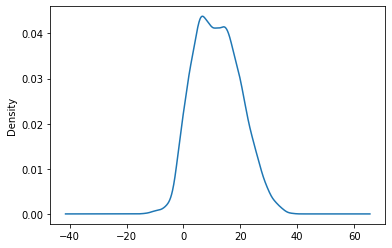

In [ ]:
t = df['temperature']

mean = t.mean()
median = t.median()
mode = t.mode()
variance = t.var()
std = t.std()

print(f"mean: {mean}, median: {median}, variance: {variance}, standard deviation: {std}, mode: {mode[0]} ")

ax = t.plot.kde()

mean: 101738.75181755568, median: 101740.0, variance: 735103.0912749652, standard deviation: 857.38153191853, mode: 101560.0 


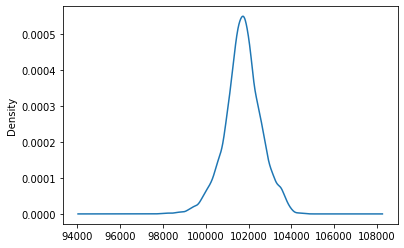

In [ ]:
pression = df['pression']

mean = pression.mean()
median = pression.median()
mode = pression.mode()
variance = pression.var()
std = pression.std()

print(f"mean: {mean}, median: {median}, variance: {variance}, standard deviation: {std}, mode: {mode[0]} ")

ax = pression.plot.kde()

mean: 0.1993475591034695, median: 0.0, variance: 1.1332546117253792, standard deviation: 1.0645443211653423, mode: 0.0 


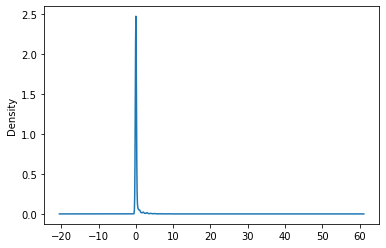

In [ ]:
precipitation = df['precipitation']
mean = precipitation.mean()
median = precipitation.median()
mode = precipitation.mode()
variance = precipitation.var()
std = precipitation.std()

print(f"mean: {mean}, median: {median}, variance: {variance}, standard deviation: {std}, mode: {mode[0]} ")

ax = precipitation.plot.kde()

mean: 75.02812428254381, median: 79.0, variance: 332.2231021563667, standard deviation: 18.226988290893445, mode: 94.0 


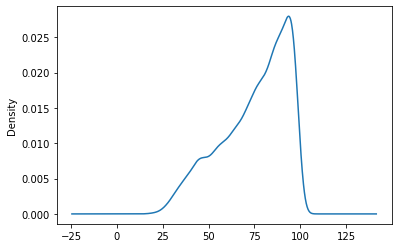

In [ ]:
h = df['humidite']
mean = h.mean()
median = h.median()
mode = h.mode()
variance = h.var()
std = h.std()

print(f"mean: {mean}, median: {median}, variance: {variance}, standard deviation: {std}, mode: {mode[0]} ")

ax = h.plot.kde()

mean: 2.826937226948724, median: 2.4, variance: 3.8277252835311284, standard deviation: 1.956457329851875, mode: 1.5 


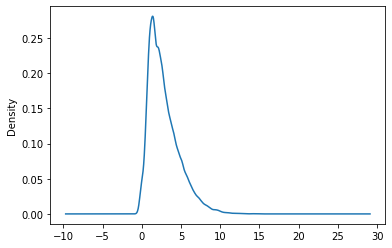

In [ ]:
v = df['vitesse_vent']
mean = v.mean()
median = v.median()
mode = v.mode()
variance = v.var()
std = v.std()

print(f"mean: {mean}, median: {median}, variance: {variance}, standard deviation: {std}, mode: {mode[0]} ")

ax = v.plot.kde()

Representing correlations


If there is no correlation the color is gray.






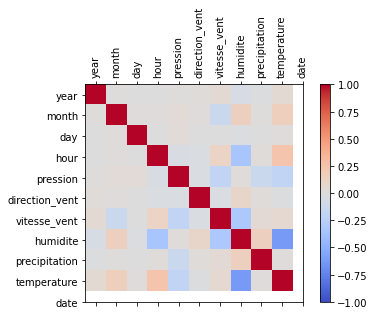

In [ ]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()


Verification of correlation coefficients

In [ ]:
df.corr()

,year,month,day,hour,pression,direction_vent,vitesse_vent,humidite,precipitation,temperature
year,1.000000,0.001018,-0.001441,-0.000199,0.000650,0.022646,0.049222,-0.047759,-0.011095,0.049764
month,0.001018,1.000000,0.011091,0.009467,0.038394,0.011931,-0.125875,0.149404,0.002134,0.157870
day,-0.001441,0.011091,1.000000,-0.000182,0.036198,-0.004742,-0.004348,-0.017436,-0.003749,0.010485
hour,-0.000199,0.009467,-0.000182,1.000000,-0.038499,-0.026178,0.118616,-0.340835,0.018019,0.243445
pression,0.000650,0.038394,0.036198,-0.038499,1.000000,-0.026921,-0.182910,0.017951,-0.132084,-0.183187
direction_vent,0.022646,0.011931,-0.004742,-0.026178,-0.026921,1.000000,-0.027260,0.095896,0.022626,-0.009518
vitesse_vent,0.049222,-0.125875,-0.004348,0.118616,-0.182910,-0.027260,1.000000,-0.318896,0.044255,0.065494
humidite,-0.047759,0.149404,-0.017436,-0.340835,0.017951,0.095896,-0.318896,1.000000,0.153353,-0.621434
precipitation,-0.011095,0.002134,-0.003749,0.018019,-0.132084,0.022626,0.044255,0.153353,1.000000,0.011593
temperature,0.049764,0.157870,0.010485,0.243445,-0.183187,-0.009518,0.065494,-0.621434,0.011593,1.000000


From the table, I conclude the following correlations:

Negative linear correlation between temperature and pressure (-0.18).
Negative linear correlation between temperature and pressure (-0.62).

Negative linear correlation between wind speed and pressure (-0.18).
Negative linear correlation between precipitation and pressure (-0.13).

Negative linear correlation between humidity and wind speed (-0.3).
Positive linear correlation between humidity and precipitation (0.15).
 
Among these results, only the correlation between temperature and pressure is a bit strong.